In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from common import fetch_data, get_backtest_result, get_hodl_result, max_drawdown, get_cache_path, save_cache_data, load_cache_data

In [2]:
# Leveraged funding arbitrage

# Fetch and save funding rate history PNL 
from datetime import datetime, timedelta

# Input
min_time = (datetime.now() - timedelta(days=365)).timestamp()
max_time = datetime.now().timestamp()

short_exchange = 'binance'
short_market = 'BTCUSDT'

leverage_levels = [1, 3, 5, 7]

# Initial variables
results = {}

data_df = load_cache_data(short_exchange, short_market)
data_df['datetime'] = data_df['datetime'].apply(lambda x: pd.to_datetime(x))
data_df = data_df[(data_df['timestamp'] > min_time) & (data_df['timestamp'] < max_time)]
data_df = data_df.sort_values(by='datetime', ascending=True)
data_df = data_df.reset_index(drop=True)

for leverage in leverage_levels:
    result_df = get_backtest_result(data_df, leverage)

    if (leverage not in results):
        results[leverage] = {}
    results[leverage] = result_df

# Results are store in 'results' variable

/Users/sainy/Documents/projects/funding/funding-arb-analysis/common.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'clt'] = max(new_clt, 0)
/Users/sainy/Documents/projects/funding/funding-arb-analysis/common.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '16783.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'pos_size'] = price * df.loc[index, 'clt'] * df.loc[index, 'leverage']
/Users/sainy/Documents/projects/funding/funding-arb-analysis/common.py:99: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.995e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.

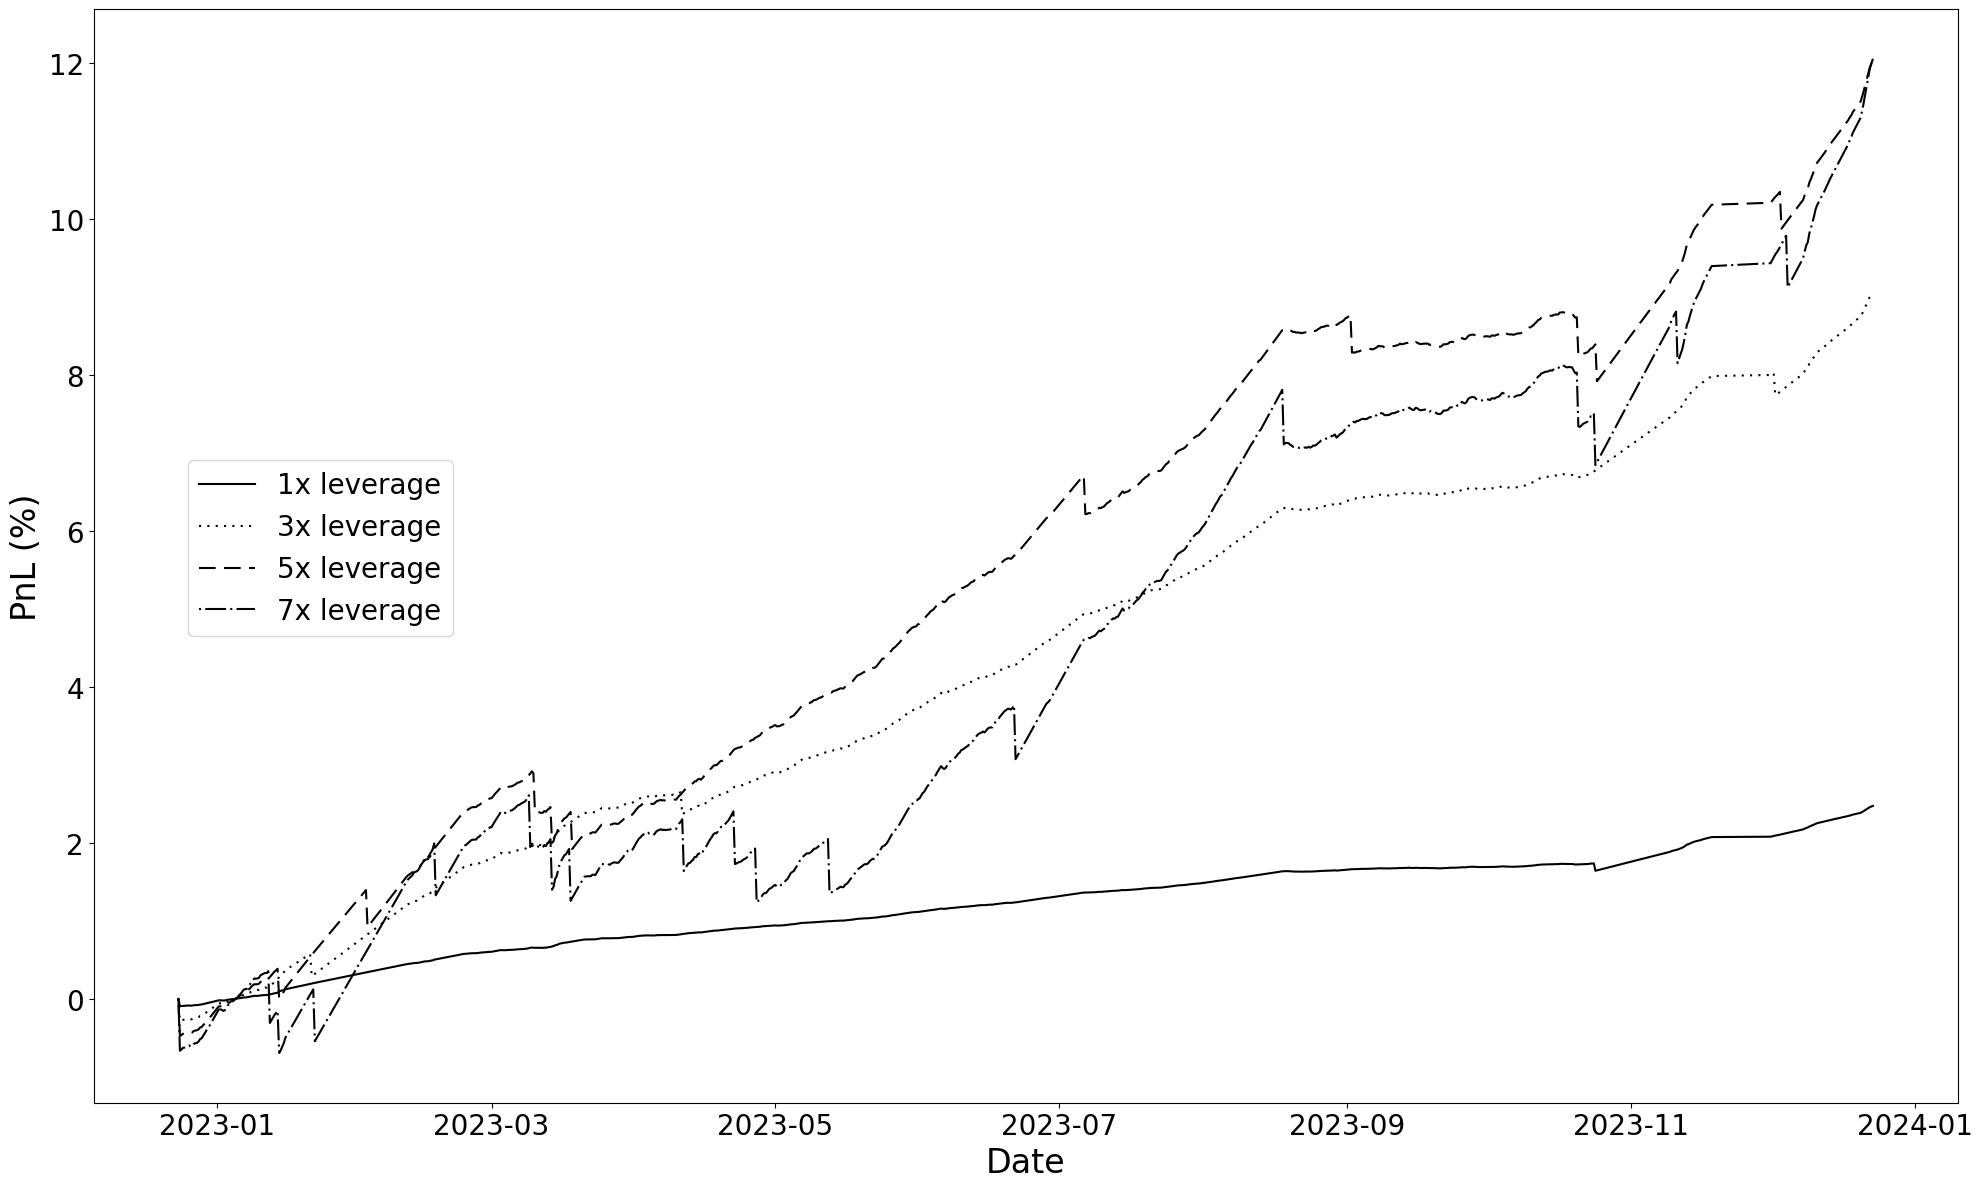

In [3]:
# Plot leveraged funding arbitrage result

# Plot setup
line_styles = {"1": "-", "3": ":", "5": "--", "7": "-."}
dash_styles = {"1": [], "3": [1, 3], "5": [8, 4], "7":[1, 2, 10, 2]}

# Plot
fig, ax = plt.subplots(figsize=(20, 12))

for leverage in leverage_levels:
    result_df = results[leverage]
    # ax.plot(result_df['datetime'], result_df['final_pnl'] * 100, label=f'{leverage}x PNL (%)')
    line,  = ax.plot(
        result_df["datetime"],
        result_df["final_pnl"] * 100,
        label=f"{leverage}x leverage",
        linestyle=line_styles[f'{leverage}'],
        color="black",
    )
    line.set_dashes(dash_styles[f'{leverage}'])

# Chart settings
lines, labels = ax.get_legend_handles_labels()
plt.xlabel("Date", fontsize=24)
plt.ylabel("PnL (%)", fontsize=24)
ax.legend(lines, labels, loc="upper right", bbox_to_anchor=(0.2, 0.6), fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Ensure a tight layout to avoid label/legend clipping
plt.tight_layout()

plt.savefig('./images/leveraged.png', format='png', dpi=300, bbox_inches='tight')

plt.show()